# Second Effort: Preprocessing Data

# Setup

##NOTE: Add outliers to preprocessing steps

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
from os import path

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import zscore
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Loading data

In [3]:
ind_ratio = 0.8

ind_size = int(3406088 * ind_ratio)
sampleindices = np.random.choice(np.arange(1,3406088), (ind_size), replace = False)
sampleindices

array([2964489, 3388459, 2261362, ..., 1644096, 2694786,  961929],
      shape=(2724870,))

In [4]:
df = pd.read_csv("../preprocessed_data/data_ml_merged_v2.csv", skiprows=sampleindices, header = 0)

df.head()

,SalesKey,DateKey,channelKey,StoreKey,ProductKey,PromotionKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,...,ProductCategoryKey,GeographyKey,StoreType,EmployeeCount,SellingAreaSize,GeographyType,ContinentName,CityName,StateProvinceName,RegionCountryName
0,7,2007-11-19,4,310,1016,5,68.06,148.00,6,0,...,4.0,710,Reseller,17,93800,City,Asia,Beijing,Beijing,China
1,8,2008-04-10,2,307,138,15,229.93,499.99,9,0,...,2.0,710,Online,8,93800,City,Asia,Beijing,Beijing,China
2,13,2007-07-25,1,171,739,3,78.19,236.00,12,0,...,3.0,932,Store,25,700,City,North America,South Portland,Maine,United States
3,14,2008-12-16,1,16,1269,13,25.47,49.96,13,0,...,4.0,627,Store,17,462,City,North America,Everett,Washington,United States
4,17,2008-02-19,1,161,1655,11,96.08,289.99,9,0,...,6.0,848,Store,22,500,City,North America,Holyoke,Massachusetts,United States


In [5]:
df.describe()

,SalesKey,channelKey,StoreKey,ProductKey,PromotionKey,UnitCost,UnitPrice,SalesQuantity,ReturnQuantity,ReturnAmount,...,ProductSubcategoryKey,ClassID,StyleID,ColorID,Weight,StockTypeID,ProductCategoryKey,GeographyKey,EmployeeCount,SellingAreaSize
count,6.812190e+05,681219.000000,681219.000000,681219.000000,681219.000000,681219.000000,681219.000000,681219.000000,681219.000000,681219.000000,...,613423.000000,613423.000000,613423.000000,613423.000000,613423.000000,613423.000000,613423.000000,681219.000000,681219.000000,681219.000000
mean,1.703988e+06,1.659314,199.071259,1274.917511,8.468664,136.929417,320.360045,15.760406,0.144798,45.726245,...,28.936073,1.750582,2.232181,6.662853,21.879186,1.529692,4.965168,772.956481,55.811012,9520.299660
std,9.832036e+05,1.028599,94.832308,711.977604,8.224269,167.437222,428.313134,34.279067,0.362549,201.317348,...,12.539262,0.654324,1.580280,3.688552,37.461101,0.707035,2.291026,114.020065,80.008741,27417.170389
min,7.000000e+00,1.000000,1.000000,1.000000,1.000000,0.480000,0.950000,2.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.170000,1.000000,1.000000,424.000000,7.000000,450.000000
25%,8.526295e+05,1.000000,126.000000,663.000000,1.000000,32.190000,68.000000,9.000000,0.000000,0.000000,...,20.000000,1.000000,1.000000,2.000000,4.000000,1.000000,3.000000,710.000000,17.000000,480.000000
50%,1.703185e+06,1.000000,200.000000,1267.000000,4.000000,84.120000,190.000000,10.000000,0.000000,0.000000,...,28.000000,2.000000,1.000000,7.000000,6.900000,1.000000,4.000000,790.000000,25.000000,500.000000
75%,2.556121e+06,2.000000,300.000000,1905.000000,14.000000,164.630000,369.000000,13.000000,0.000000,0.000000,...,42.000000,2.000000,3.000000,8.000000,23.000000,2.000000,8.000000,871.000000,47.000000,700.000000
max,3.406089e+06,4.000000,310.000000,2517.000000,28.000000,1060.220000,3199.990000,2400.000000,4.000000,6399.980000,...,48.000000,3.000000,16.000000,16.000000,239.000000,3.000000,8.000000,952.000000,325.000000,93800.000000


In [6]:
df.shape

(681219, 41)

In [7]:
df.isna().sum()

SalesKey                       0
DateKey                        0
channelKey                     0
StoreKey                       0
ProductKey                     0
PromotionKey                   0
UnitCost                       0
UnitPrice                      0
SalesQuantity                  0
ReturnQuantity                 0
ReturnAmount                   0
DiscountQuantity               0
DiscountAmount                 0
TotalCost                      0
SalesAmount                    0
DiscountPercent                0
CalendarYear                   0
CalendarQuarterLabel           0
CalendarWeekLabel              0
IsWorkDay                      0
IsHoliday                      0
MonthNumber                    0
CalendarDayOfWeekNumber        0
ProductSubcategoryKey      67796
BrandName                  67796
ClassID                    67796
StyleID                    67796
ColorID                    67796
Weight                     67796
WeightUnitMeasureID        67796
StockTypeI

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681219 entries, 0 to 681218
Data columns (total 41 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SalesKey                 681219 non-null  int64  
 1   DateKey                  681219 non-null  object 
 2   channelKey               681219 non-null  int64  
 3   StoreKey                 681219 non-null  int64  
 4   ProductKey               681219 non-null  int64  
 5   PromotionKey             681219 non-null  int64  
 6   UnitCost                 681219 non-null  float64
 7   UnitPrice                681219 non-null  float64
 8   SalesQuantity            681219 non-null  int64  
 9   ReturnQuantity           681219 non-null  int64  
 10  ReturnAmount             681219 non-null  float64
 11  DiscountQuantity         681219 non-null  int64  
 12  DiscountAmount           681219 non-null  float64
 13  TotalCost                681219 non-null  float64
 14  Sale

In [9]:
df.isnull().sum()

SalesKey                       0
DateKey                        0
channelKey                     0
StoreKey                       0
ProductKey                     0
PromotionKey                   0
UnitCost                       0
UnitPrice                      0
SalesQuantity                  0
ReturnQuantity                 0
ReturnAmount                   0
DiscountQuantity               0
DiscountAmount                 0
TotalCost                      0
SalesAmount                    0
DiscountPercent                0
CalendarYear                   0
CalendarQuarterLabel           0
CalendarWeekLabel              0
IsWorkDay                      0
IsHoliday                      0
MonthNumber                    0
CalendarDayOfWeekNumber        0
ProductSubcategoryKey      67796
BrandName                  67796
ClassID                    67796
StyleID                    67796
ColorID                    67796
Weight                     67796
WeightUnitMeasureID        67796
StockTypeI

In [10]:
df.dtypes

SalesKey                     int64
DateKey                     object
channelKey                   int64
StoreKey                     int64
ProductKey                   int64
PromotionKey                 int64
UnitCost                   float64
UnitPrice                  float64
SalesQuantity                int64
ReturnQuantity               int64
ReturnAmount               float64
DiscountQuantity             int64
DiscountAmount             float64
TotalCost                  float64
SalesAmount                float64
DiscountPercent            float64
CalendarYear                 int64
CalendarQuarterLabel        object
CalendarWeekLabel           object
IsWorkDay                   object
IsHoliday                   object
MonthNumber                  int64
CalendarDayOfWeekNumber      int64
ProductSubcategoryKey      float64
BrandName                   object
ClassID                    float64
StyleID                    float64
ColorID                    float64
Weight              

In [11]:
# Instantiate a SimpleImputer object with your strategy of choice
imputer = SimpleImputer(strategy="constant", fill_value=0)
# Call the "fit" method on the object
imputer.fit(df[['ProductSubcategoryKey']])
df['ProductSubcategoryKey'] = imputer.transform(df[['ProductSubcategoryKey']])
imputer.fit(df[['ClassID']])
df['ClassID'] = imputer.transform(df[['ClassID']])
imputer.fit(df[['StyleID']])
df['StyleID'] = imputer.transform(df[['StyleID']])  # Fixed this line
imputer.fit(df[['ColorID']])
df['ColorID'] = imputer.transform(df[['ColorID']])

imputer.fit(df[['Weight']])
df['Weight'] = imputer.transform(df[['Weight']])
imputer.fit(df[['StockTypeID']])
df['StockTypeID'] = imputer.transform(df[['StockTypeID']])
imputer.fit(df[['ProductCategoryKey']])
df['ProductCategoryKey'] = imputer.transform(df[['ProductCategoryKey']])

In [12]:
df['BrandName'] = df['BrandName'].fillna('N/A')

In [13]:
#Basic column transforms
#1. Promo key 1 means no discount. ALl other promo keys indicate some discount. We change promo keys to 1 and 0. 1 means no disc, 0 means disc
#2. Stock type ID 1 means High, 3 means low. THis is opposite of how the ML model learns. So, we switch
#3. Weights are in different units. Convert all to grams.
#4. Convert quarter values from Q1, Q2...to 1,2...This is neeeded for cyclical engg. later
#5. Set Sales Key as index of dataframe
#6. Ensure DateKey column is in DateTime format
0
#1. 
df['PromotionKey'] = np.where(df['PromotionKey'] == 1, 1, 0)

#2. 
df['StockTypeID'] = df['StockTypeID'].replace({1: 3, 3: 1})

#3. 
conversion_factors = {
    'pounds': 453.592,    
    'ounces': 28.3495,   
    'grams': 1.0        
}

# Convert weights to grams
df['Weight'] = df['Weight'] * df['WeightUnitMeasureID'].map(conversion_factors)

# Rename the Weight column
df = df.rename(columns={'Weight': 'Weight(grams)'})

# Delete the WeightUnitMeasureID column
df = df.drop('WeightUnitMeasureID', axis=1)

#4.
df['CalendarQuarterLabel'] = df['CalendarQuarterLabel'].str.extract('(\d+)').astype(int)

#5.
df = df.set_index('SalesKey')

#6.
df['DateKey'] = pd.to_datetime(df['DateKey'])

<>:32: SyntaxWarning: invalid escape sequence '\d'
<>:32: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_1681/2705375494.py:32: SyntaxWarning: invalid escape sequence '\d'
  df['CalendarQuarterLabel'] = df['CalendarQuarterLabel'].str.extract('(\d+)').astype(int)


In [14]:
#Cyclical engineering to ensure proximity of dec to jan usw.
months_in_year = 12
df['sin_MonthNumber'] = np.sin(2*np.pi*df.MonthNumber/months_in_year)
df['cos_MonthNumber'] = np.cos(2*np.pi*df.MonthNumber/months_in_year)
df.drop(columns=['MonthNumber'], inplace=True)
df.columns

Index(['DateKey', 'channelKey', 'StoreKey', 'ProductKey', 'PromotionKey',
       'UnitCost', 'UnitPrice', 'SalesQuantity', 'ReturnQuantity',
       'ReturnAmount', 'DiscountQuantity', 'DiscountAmount', 'TotalCost',
       'SalesAmount', 'DiscountPercent', 'CalendarYear',
       'CalendarQuarterLabel', 'CalendarWeekLabel', 'IsWorkDay', 'IsHoliday',
       'CalendarDayOfWeekNumber', 'ProductSubcategoryKey', 'BrandName',
       'ClassID', 'StyleID', 'ColorID', 'Weight(grams)', 'StockTypeID',
       'ProductCategoryKey', 'GeographyKey', 'StoreType', 'EmployeeCount',
       'SellingAreaSize', 'GeographyType', 'ContinentName', 'CityName',
       'StateProvinceName', 'RegionCountryName', 'sin_MonthNumber',
       'cos_MonthNumber'],
      dtype='object')

In [15]:
#Cyclical engineering to ensure proximity of sat to sun usw.
#calendarweeklabel dropped as its impact is same as cyclical engg.
days_in_week = 7
df['sin_CalendarDayOfWeekNumber'] = np.sin(2*np.pi*df.CalendarDayOfWeekNumber/days_in_week)
df['cos_CalendarDayOfWeekNumber'] = np.cos(2*np.pi*df.CalendarDayOfWeekNumber/days_in_week)
df.drop(columns=['CalendarDayOfWeekNumber','CalendarWeekLabel'], inplace=True)
df.columns

Index(['DateKey', 'channelKey', 'StoreKey', 'ProductKey', 'PromotionKey',
       'UnitCost', 'UnitPrice', 'SalesQuantity', 'ReturnQuantity',
       'ReturnAmount', 'DiscountQuantity', 'DiscountAmount', 'TotalCost',
       'SalesAmount', 'DiscountPercent', 'CalendarYear',
       'CalendarQuarterLabel', 'IsWorkDay', 'IsHoliday',
       'ProductSubcategoryKey', 'BrandName', 'ClassID', 'StyleID', 'ColorID',
       'Weight(grams)', 'StockTypeID', 'ProductCategoryKey', 'GeographyKey',
       'StoreType', 'EmployeeCount', 'SellingAreaSize', 'GeographyType',
       'ContinentName', 'CityName', 'StateProvinceName', 'RegionCountryName',
       'sin_MonthNumber', 'cos_MonthNumber', 'sin_CalendarDayOfWeekNumber',
       'cos_CalendarDayOfWeekNumber'],
      dtype='object')

In [16]:
#Cyclical engineering to ensure proximity of Q1 to Q4 usw.
quarters_in_year = 4
df['sin_CalendarQuarterLabel'] = np.sin(2*np.pi*df.CalendarQuarterLabel/quarters_in_year)
df['cos_CalendarQuarterLabel'] = np.cos(2*np.pi*df.CalendarQuarterLabel/quarters_in_year)
df.drop(columns=['CalendarQuarterLabel'], inplace=True)
df.columns

Index(['DateKey', 'channelKey', 'StoreKey', 'ProductKey', 'PromotionKey',
       'UnitCost', 'UnitPrice', 'SalesQuantity', 'ReturnQuantity',
       'ReturnAmount', 'DiscountQuantity', 'DiscountAmount', 'TotalCost',
       'SalesAmount', 'DiscountPercent', 'CalendarYear', 'IsWorkDay',
       'IsHoliday', 'ProductSubcategoryKey', 'BrandName', 'ClassID', 'StyleID',
       'ColorID', 'Weight(grams)', 'StockTypeID', 'ProductCategoryKey',
       'GeographyKey', 'StoreType', 'EmployeeCount', 'SellingAreaSize',
       'GeographyType', 'ContinentName', 'CityName', 'StateProvinceName',
       'RegionCountryName', 'sin_MonthNumber', 'cos_MonthNumber',
       'sin_CalendarDayOfWeekNumber', 'cos_CalendarDayOfWeekNumber',
       'sin_CalendarQuarterLabel', 'cos_CalendarQuarterLabel'],
      dtype='object')

In [17]:
print(df.columns)

Index(['DateKey', 'channelKey', 'StoreKey', 'ProductKey', 'PromotionKey',
       'UnitCost', 'UnitPrice', 'SalesQuantity', 'ReturnQuantity',
       'ReturnAmount', 'DiscountQuantity', 'DiscountAmount', 'TotalCost',
       'SalesAmount', 'DiscountPercent', 'CalendarYear', 'IsWorkDay',
       'IsHoliday', 'ProductSubcategoryKey', 'BrandName', 'ClassID', 'StyleID',
       'ColorID', 'Weight(grams)', 'StockTypeID', 'ProductCategoryKey',
       'GeographyKey', 'StoreType', 'EmployeeCount', 'SellingAreaSize',
       'GeographyType', 'ContinentName', 'CityName', 'StateProvinceName',
       'RegionCountryName', 'sin_MonthNumber', 'cos_MonthNumber',
       'sin_CalendarDayOfWeekNumber', 'cos_CalendarDayOfWeekNumber',
       'sin_CalendarQuarterLabel', 'cos_CalendarQuarterLabel'],
      dtype='object')


In [18]:
print(df['sin_MonthNumber'].head(10))

SalesKey
7    -5.000000e-01
8     8.660254e-01
13   -5.000000e-01
14   -2.449294e-16
17    8.660254e-01
21   -2.449294e-16
22    8.660254e-01
24    1.000000e+00
25    1.224647e-16
28   -2.449294e-16
Name: sin_MonthNumber, dtype: float64


In [19]:
#List of columns divided by numerical and text so that I know whether to scale or encode

'''
Numerical:'channelKey', 'StoreKey', 'ProductKey', 'PromotionKey', 'UnitCost', 'UnitPrice', 'TotalCost',
'ReturnQuantity','ReturnAmount', 'DiscountQuantity', 'DiscountAmount',
'DiscountPercent', 'CalendarYear', 'ProductSubcategoryKey', 'ClassID', 'StyleID', 'ColorID', 'Weight(grams)', 
'StockTypeID', 'ProductCategoryKey', 'GeographyKey',  'EmployeeCount', 'SellingAreaSize',
'sin_MonthNumber', 'cos_MonthNumber', 'sin_CalendarDayOfWeekNumber','cos_CalendarDayOfWeekNumber', 'sin_CalendarQuarterLabel',
'cos_CalendarQuarterLabel'




Text:
Categories: 'IsWorkDay', 'IsHoliday', 'BrandName', 'StoreType', 'GeographyType', 'ContinentName', 
'CityName', 'StateProvinceName', 'RegionCountryName'

'''

"\nNumerical:'channelKey', 'StoreKey', 'ProductKey', 'PromotionKey', 'UnitCost', 'UnitPrice', 'TotalCost',\n'ReturnQuantity','ReturnAmount', 'DiscountQuantity', 'DiscountAmount',\n'DiscountPercent', 'CalendarYear', 'ProductSubcategoryKey', 'ClassID', 'StyleID', 'ColorID', 'Weight(grams)', \n'StockTypeID', 'ProductCategoryKey', 'GeographyKey',  'EmployeeCount', 'SellingAreaSize',\n'sin_MonthNumber', 'cos_MonthNumber', 'sin_CalendarDayOfWeekNumber','cos_CalendarDayOfWeekNumber', 'sin_CalendarQuarterLabel',\n'cos_CalendarQuarterLabel'\n\n\n\n\nText:\nCategories: 'IsWorkDay', 'IsHoliday', 'BrandName', 'StoreType', 'GeographyType', 'ContinentName', \n'CityName', 'StateProvinceName', 'RegionCountryName'\n\n"

In [20]:
rb_scaler = RobustScaler()

cols_to_scale = [
    'channelKey', 'StoreKey', 'ProductKey', 'PromotionKey','StockTypeID',
    'UnitCost', 'UnitPrice', 'TotalCost', 'ReturnQuantity', 'ReturnAmount', 
    'DiscountQuantity', 'DiscountAmount', 'DiscountPercent', 'CalendarYear', 
    'ProductSubcategoryKey', 'ClassID', 'StyleID', 'ColorID', 'Weight(grams)', 
    'ProductCategoryKey', 'GeographyKey', 'EmployeeCount', 
    'SellingAreaSize', 'sin_MonthNumber', 'cos_MonthNumber', 
    'sin_CalendarDayOfWeekNumber', 'cos_CalendarDayOfWeekNumber', 
    'sin_CalendarQuarterLabel', 'cos_CalendarQuarterLabel'
]

rb_scaler = RobustScaler()
df[cols_to_scale] = rb_scaler.fit_transform(df[cols_to_scale])

In [21]:
ohe = OneHotEncoder(sparse_output=False)

cols_to_encode = [
   'IsWorkDay','IsHoliday','BrandName','StoreType','GeographyType','RegionCountryName'
]
ohe.fit(df[cols_to_encode])
df[ohe.get_feature_names_out()] = ohe.transform(df[cols_to_encode])
df = df.drop(columns=cols_to_encode)

***Inspect the distribution of Sales Amount***

In [22]:
#Check 1: What %age of sales amount transactions are outliers?
from scipy.stats import zscore

# Calculate z-scores
z_scores = zscore(df['SalesAmount'])

# Identify outliers (absolute z-score > 2.5)
is_outlier = (abs(z_scores) > 2.5)

# Count outliers
num_outliers = sum(is_outlier)

# Total number of data points
total = len(df['SalesAmount'])

# Calculate percentage
percentage_outliers = (num_outliers / total) * 100

print(f"Percentage of outliers: {percentage_outliers:.2f}%")



Percentage of outliers: 2.55%


In [23]:
#Check2: How Gaussian is the distribution of Sales Amount?

from scipy.stats import anderson

# Perform the Anderson-Darling test for normality
result = anderson(df['SalesAmount'], dist='norm')

print("Anderson-Darling Test for Normality:")
print(f"Test Statistic: {result.statistic:.3f}\n")

print("Critical Values and Interpretation:")
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"{sl}%: {cv:.3f}, data looks normal (fail to reject H0)")
    else:
        print(f"{sl}%: {cv:.3f}, data does not look normal (reject H0)")

print("\nWhat is a Critical Value?")
print("A critical value is a threshold used to decide whether to reject the null hypothesis.")
print("For the Anderson-Darling test, if your test statistic is greater than the critical value,")
print("you reject the hypothesis that your data comes from a normal distribution.")
print("Critical values depend on your sample size and the chosen significance level.")
print("They are tabulated and provided by statistical software for each distribution being tested[1][2][5].")

print("\nInterpretation:")
print("Your test statistic is much larger than all critical values.")
print("This means your data is NOT normally distributed.")
print("Consider using robust statistical methods that do not assume normality.")



Anderson-Darling Test for Normality:
Test Statistic: 62956.684

Critical Values and Interpretation:
15.0%: 0.576, data does not look normal (reject H0)
10.0%: 0.656, data does not look normal (reject H0)
5.0%: 0.787, data does not look normal (reject H0)
2.5%: 0.918, data does not look normal (reject H0)
1.0%: 1.092, data does not look normal (reject H0)

What is a Critical Value?
A critical value is a threshold used to decide whether to reject the null hypothesis.
For the Anderson-Darling test, if your test statistic is greater than the critical value,
you reject the hypothesis that your data comes from a normal distribution.
Critical values depend on your sample size and the chosen significance level.
They are tabulated and provided by statistical software for each distribution being tested[1][2][5].

Interpretation:
Your test statistic is much larger than all critical values.
This means your data is NOT normally distributed.
Consider using robust statistical methods that do not assu

In [24]:
Q1 = df['SalesAmount'].quantile(0.25)
Q3 = df['SalesAmount'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers (beyond 1.5*IQR from Q1/Q3)
outliers_iqr = df[
    (df['SalesAmount'] < Q1 - 1.5 * IQR) |
    (df['SalesAmount'] > Q3 + 1.5 * IQR)
]['SalesAmount']
print("\nOutliers by IQR:")
print(outliers_iqr)




Outliers by IQR:
SalesKey
124        14080.000
255        10908.000
276        11720.000
318        13264.500
375        12162.600
             ...    
3405677    13552.000
3406004    18948.146
3406015    13627.600
3406086    11976.000
3406088    20310.750
Name: SalesAmount, Length: 43945, dtype: float64


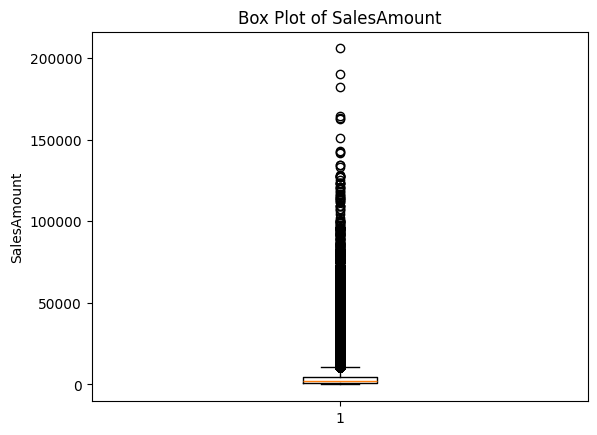

In [25]:
import matplotlib.pyplot as plt

plt.boxplot(df['SalesAmount'])
plt.title("Box Plot of SalesAmount")
plt.ylabel("SalesAmount")
plt.show()



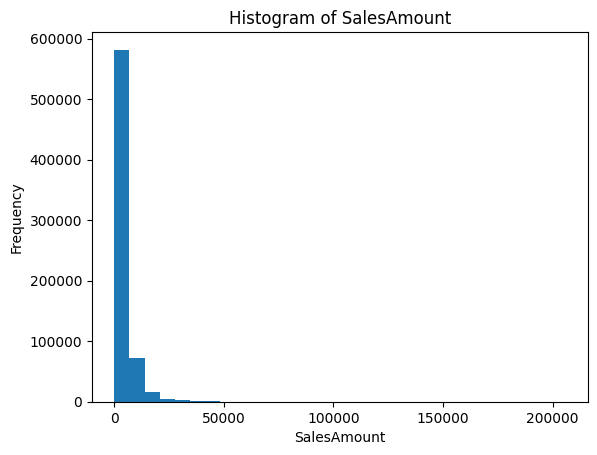

Bin edges: [3.04000000e+00 6.86510667e+03 1.37271733e+04 2.05892400e+04
 2.74513067e+04 3.43133733e+04 4.11754400e+04 4.80375067e+04
 5.48995733e+04 6.17616400e+04 6.86237067e+04 7.54857733e+04
 8.23478400e+04 8.92099067e+04 9.60719733e+04 1.02934040e+05
 1.09796107e+05 1.16658173e+05 1.23520240e+05 1.30382307e+05
 1.37244373e+05 1.44106440e+05 1.50968507e+05 1.57830573e+05
 1.64692640e+05 1.71554707e+05 1.78416773e+05 1.85278840e+05
 1.92140907e+05 1.99002973e+05 2.05865040e+05]
Range of bin 1: (np.float64(3.04), np.float64(6865.106666666667))


In [26]:
import matplotlib.pyplot as plt

# Get the bin edges
counts, bin_edges, _ = plt.hist(df['SalesAmount'], bins=30)
plt.title("Histogram of SalesAmount")
plt.xlabel("SalesAmount")
plt.ylabel("Frequency")
plt.show()

# Print the bin edges and the range of bin 1
print("Bin edges:", bin_edges)
print("Range of bin 1:", (bin_edges[0], bin_edges[1]))


In [27]:
print("\nSummary statistics:")
print(df['SalesAmount'].describe())



Summary statistics:
count    681219.000000
mean       3649.132671
std        5320.026132
min           3.040000
25%         616.560000
50%        2106.300000
75%        4572.000000
max      205865.040000
Name: SalesAmount, dtype: float64


In [28]:
# Outliers as values outside 1% and 99% quantiles
outliers_quantile = df[
    (df['SalesAmount'] < df['SalesAmount'].quantile(0.01)) |
    (df['SalesAmount'] > df['SalesAmount'].quantile(0.99))
]
print("\nOutliers by quantile (1% and 99%):")
print(outliers_quantile)



Outliers by quantile (1% and 99%):
            DateKey  channelKey  StoreKey  ProductKey  PromotionKey  UnitCost  \
SalesKey                                                                        
146      2008-05-22         0.0  0.431034   -0.279388           0.0 -0.631531   
890      2007-09-29         3.0  0.620690   -0.668277           0.0  1.289188   
945      2008-09-10         1.0  0.614943    0.480676           1.0  5.680535   
1204     2008-07-29         1.0 -0.005747    0.476651           0.0  5.680535   
1218     2008-06-10         1.0  0.614943   -0.696457           0.0  2.614467   
...             ...         ...       ...         ...           ...       ...   
3405282  2008-07-25         1.0  0.614943   -0.274557           1.0 -0.627529   
3405623  2007-10-16         0.0 -1.132184   -0.414654           1.0 -0.598611   
3405760  2007-09-16         3.0  0.626437    0.946860           0.0 -0.615977   
3405904  2009-02-03         1.0 -0.005747   -0.279388           0.0 -0.63

In [29]:
#Boolean mask to remove outliers based on SalesAmount

total_sales = df['SalesAmount'].sum()

#Find the standard deviation of 'SalesAmount'
std_sales = df['SalesAmount'].std()

#Find 2.5 times the standard deviation
threshold = 2.5 * std_sales

#Create a boolean mask (True for values above threshold, False otherwise)
boolean_mask = (df['SalesAmount']<=threshold)

# Apply the boolean filtering
df = df[boolean_mask].reset_index(drop=True)

print(total_sales)
print(std_sales)
print(threshold)

2485858509.1003003
5320.026131811429
13300.065329528572


In [30]:
df.shape

(653311, 95)

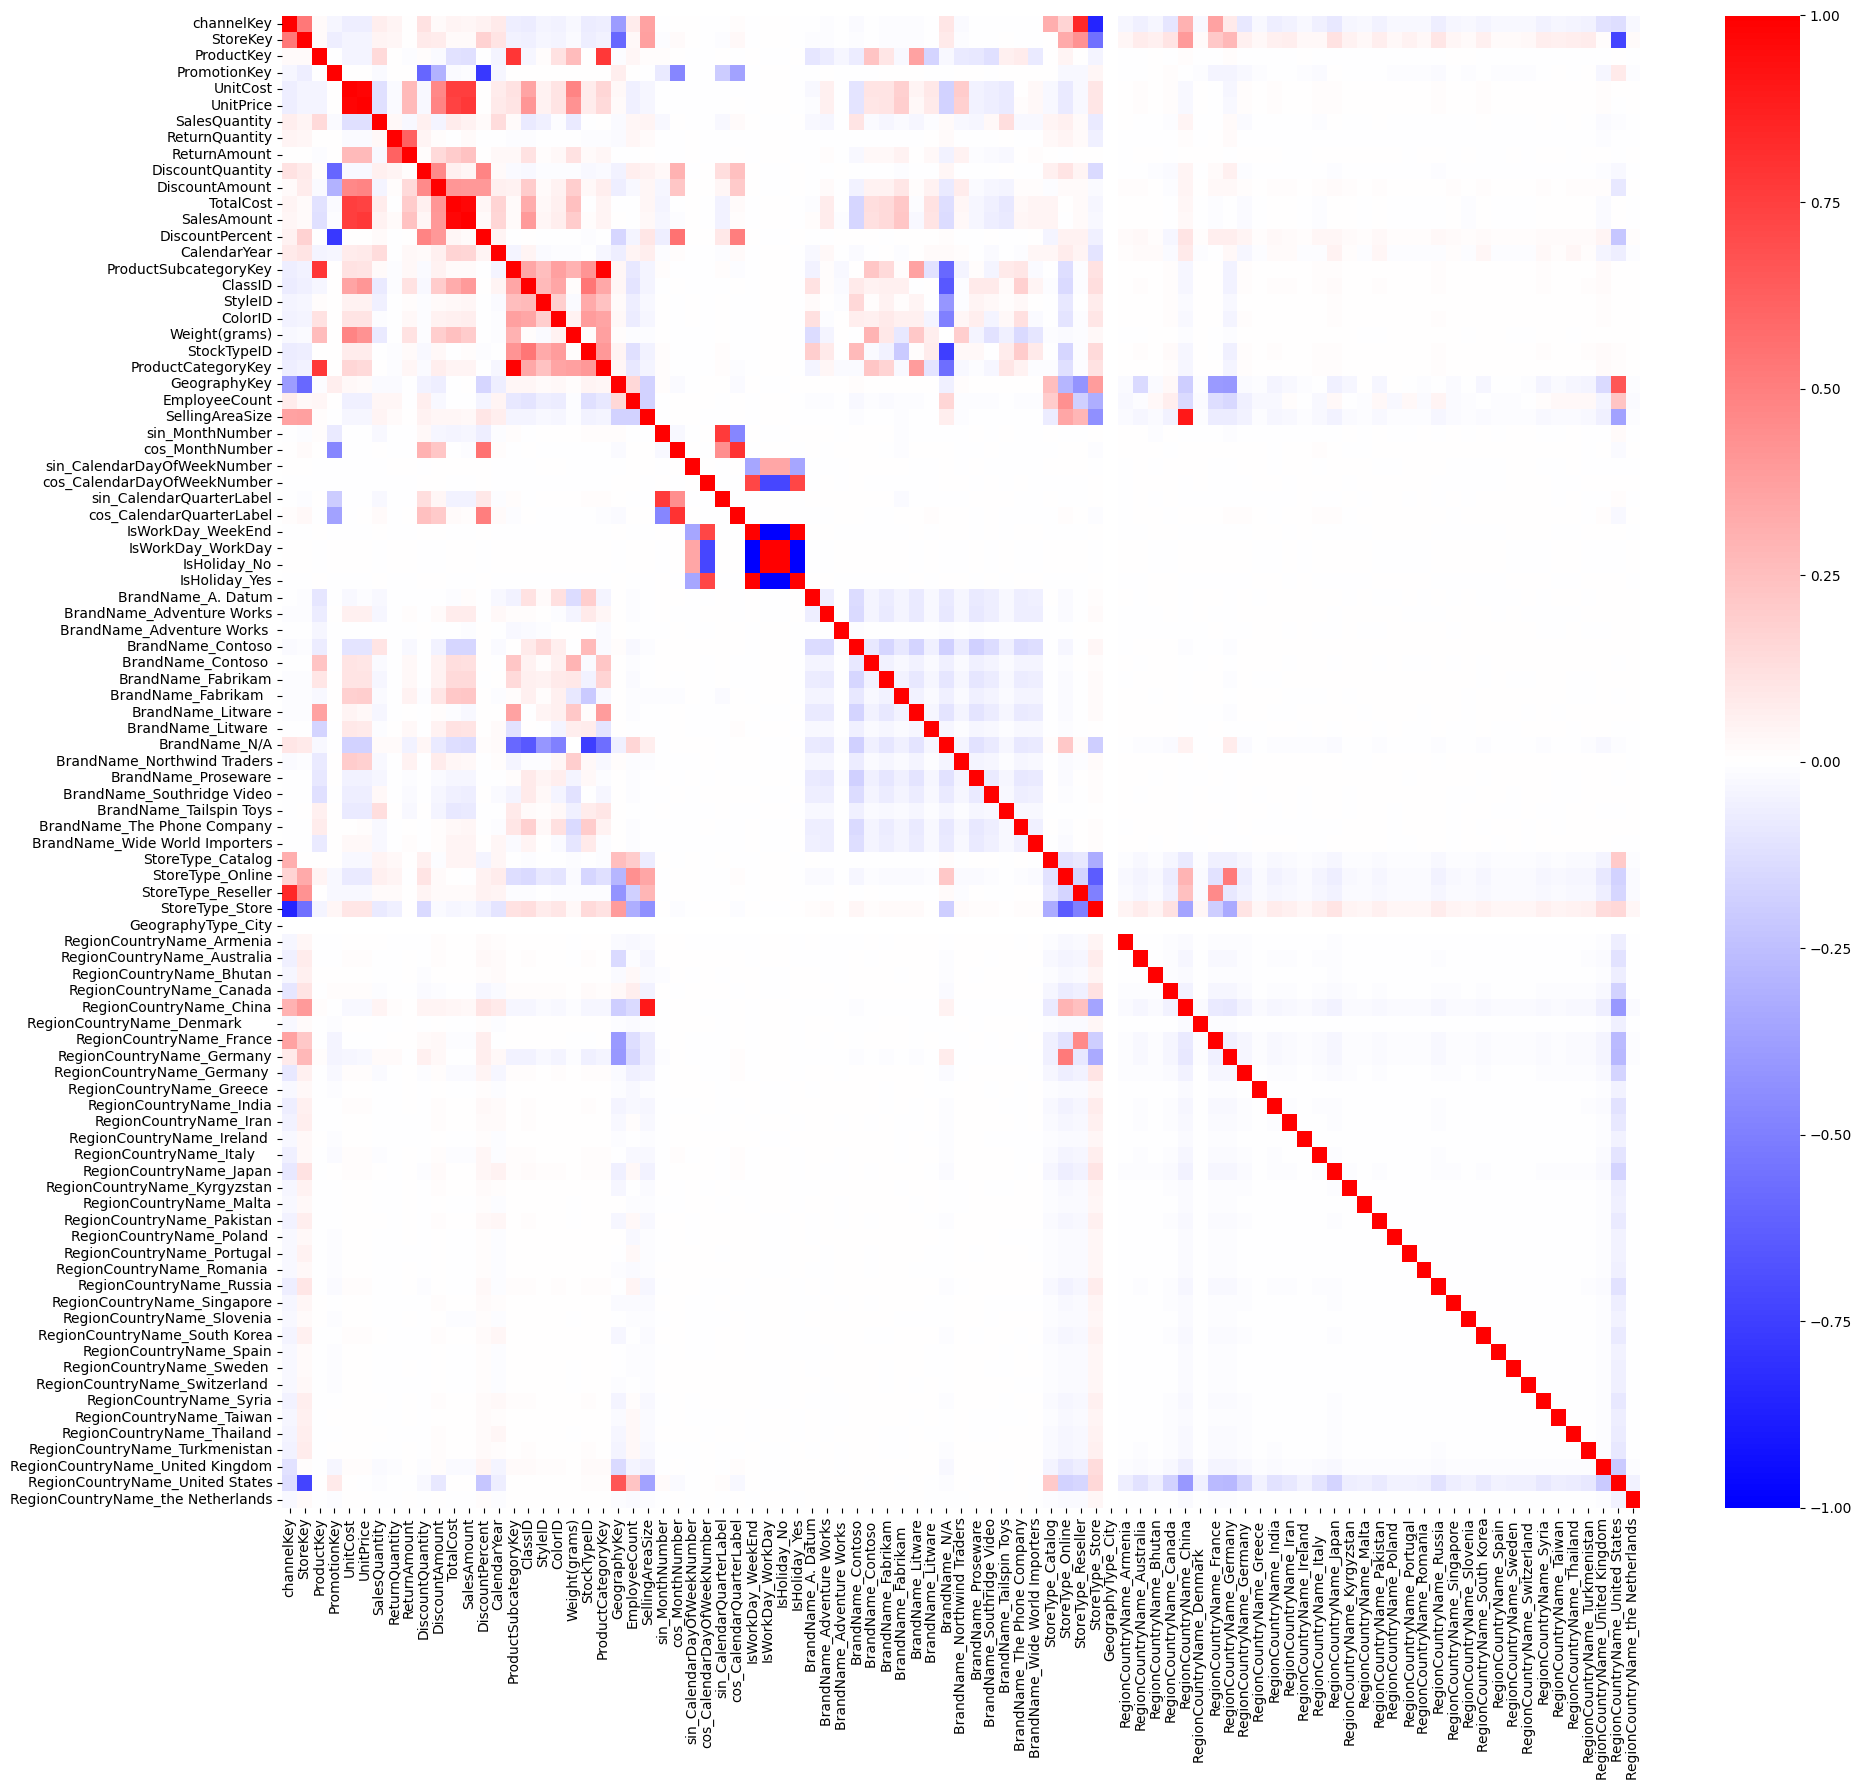

In [42]:
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names, cmap="bwr")
plt.tight_layout()
plt.savefig('heatmap.pdf', format='pdf', dpi=300)
plt.show()  # Show the plot after saving
plt.close()  # Close the plot to free memory




In [43]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Assume corr_df is your DataFrame with columns: Variable1, Variable2, correlation, absolute_correlation
# Sort and select top pairs (adjust as needed)
top_pairs = corr_df.sort_values(by="absolute_correlation", ascending=False).head(95*2)

# Create a PDF file
with PdfPages('top_correlations.pdf') as pdf:
    # Create a figure and axis for the table
    fig, ax = plt.subplots(figsize=(12, 18))  # Adjust size as needed
    ax.axis('off')
    # Plot the table
    table = ax.table(cellText=top_pairs.values,
                     colLabels=top_pairs.columns,
                     loc='center',
                     cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(8)  # Adjust font size as needed
    table.scale(1.2, 1.2)  # Adjust scale as needed
    plt.tight_layout()
    # Save the table to the PDF
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()


/tmp/ipykernel_1681/324500925.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
